In [19]:
import pandas as pd

df_solar = pd.read_csv('PotAC_2017-2020.csv', sep=';')
df_solar['date'] = pd.to_datetime(df_solar['date'], unit='s')
df_solar['value'] = df_solar['value'].replace({',': ''}, regex=True)
df_solar['value'] = pd.to_numeric(df_solar['value'], downcast="float")
df_solar = df_solar.set_index('date')
hourly_data_solar = df_solar.resample('H').sum()
hourly_data_solar['value'] = hourly_data_solar['value']
hourly_data_solar = hourly_data_solar.truncate('2019-08-24','2020-06-09')
hourly_data_solar

,value
date,
2019-08-24 00:00:00,0.0
2019-08-24 01:00:00,0.0
2019-08-24 02:00:00,0.0
2019-08-24 03:00:00,0.0
2019-08-24 04:00:00,0.0
...,...
2020-06-05 17:00:00,13538.0
2020-06-05 18:00:00,5963.0
2020-06-05 19:00:00,3787.0


In [21]:
df_pk = pd.read_csv('P0_PK_24_08_19-09_06_20.csv')
df_pk['Date'] = pd.to_datetime(df_pk['Date'], dayfirst=True)
df_pk = df_pk[df_pk['Value']>=0]
df_pk = df_pk.set_index('Date')
df_pk

,Value
Date,
2019-08-24 03:00:00,4140.98
2019-08-24 04:00:00,4461.03
2019-08-24 05:00:00,4206.58
2019-08-24 06:00:00,4536.23
2019-08-24 07:00:00,4438.93
...,...
2020-06-09 00:00:00,2465.89
2020-06-09 01:00:00,2514.46
2020-06-09 02:00:00,2742.18


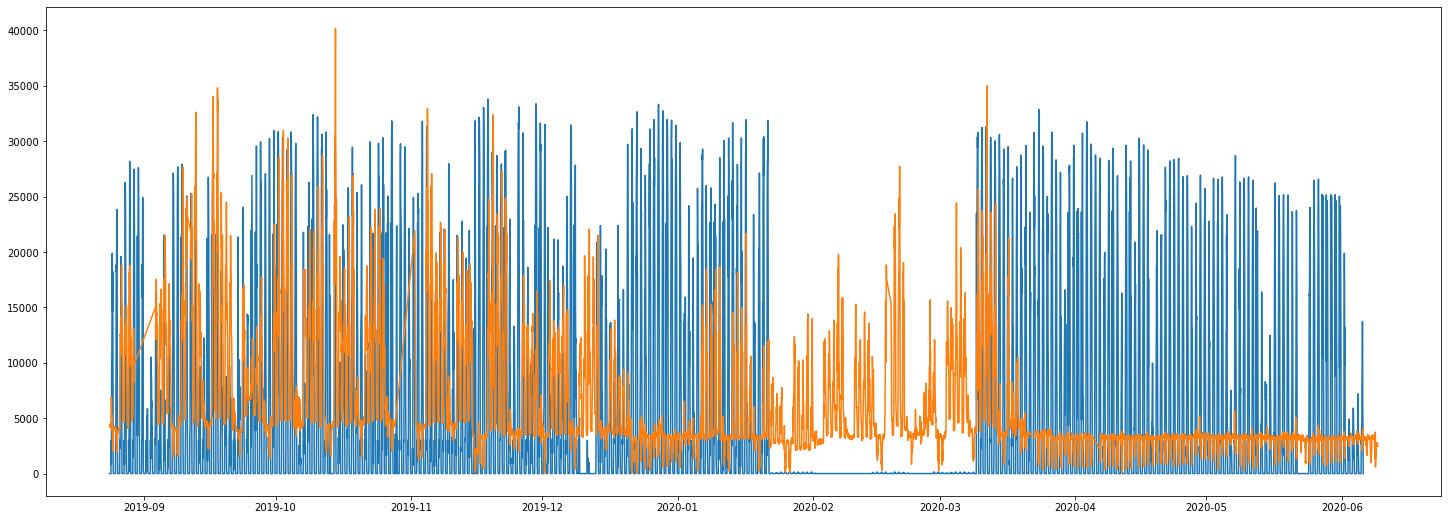

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar)
plt.plot(df_pk)

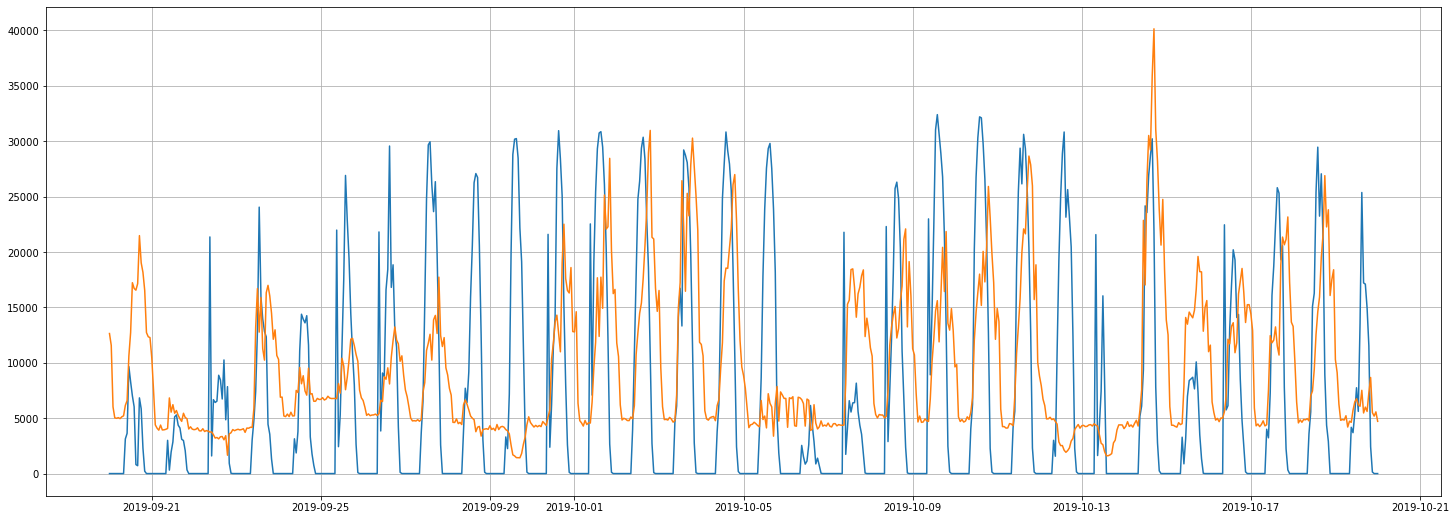

In [25]:
hourly_data_solar2 = hourly_data_solar.truncate('2019-09-20','2019-10-20')
df_pk2 = df_pk.truncate('2019-09-20','2019-10-20')
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar2)
plt.plot(df_pk2)
plt.grid()

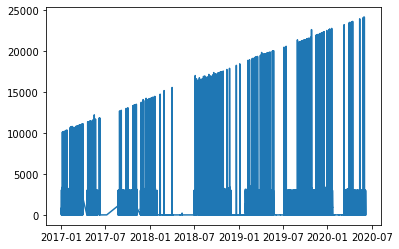

In [32]:
plt.plot(df_solar)

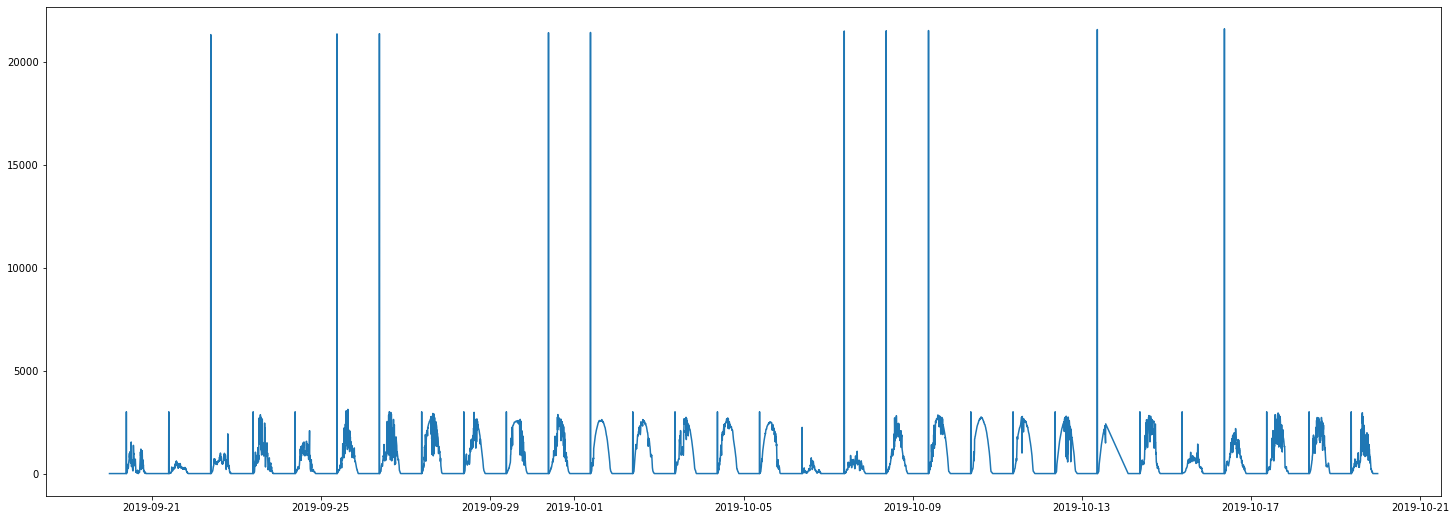

In [31]:
plt.figure(figsize=(25,9))
plt.plot(df_solar.truncate('2019-09-20','2019-10-20'))